# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [30]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import numpy as np

In [31]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [32]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sf_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [33]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
     
    housing_units = sf_data["housing_units"].groupby([sf_data.index]).mean()

    fig_housing_units=plt.figure()
    plot_housing=housing_units.plot.bar()
    plot_housing.set_xlabel("Year")
    plot_housing.set_ylabel("housing_units")
    plot_housing.set_title("Housing Units In SF")

    housing_units_std = housing_units.std()
    housing_units_min = np.min(housing_units)
    housing_units_max = np.max(housing_units)

    plot_housing.set_ylim(
        housing_units_min - housing_units_std, housing_units_max + housing_units_std
    )

    plt.close(fig_housing_units)
    
    return pn.pane.Matplotlib(fig_housing_units)


In [34]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    average_rent_sqr_foot = sf_data["gross_rent"].groupby([sf_data.index]).mean()
    
    gross_rent_fig = plt.figure()
  
    bar_chart = average_rent_sqr_foot.plot()
    bar_chart.set_xlabel("Year", fontsize=12)
    bar_chart.set_ylabel("Gross Rent", fontsize=12)
    bar_chart.set_title(
        "Gross Rent", fontsize=14, fontweight="bold"
    )


    plt.close(gross_rent_fig)
    
    return pn.pane.Matplotlib(gross_rent_fig)

In [35]:
def average_sales_price():
    """Average Sales Price Per Year."""
    
    average_price_sqr_foot = sf_data["sale_price_sqr_foot"].groupby([sf_data.index]).mean()
    sales_price_fig = plt.figure()
    bar_chart = average_price_sqr_foot.plot()
    bar_chart.set_xlabel("Year", fontsize=12)
    bar_chart.set_ylabel("Price Per Square Foot", fontsize=12)
    bar_chart.set_title(
        "Average Sale Price per Square Foot in San Francisco", fontsize=14, fontweight="bold"
    )
    plt.close(sales_price_fig)
    return pn.pane.Matplotlib(sales_price_fig)


In [36]:
def average_price_by_neighborhood(neighborhood):
    """Average Prices by Neighborhood."""
    
    sf_sales_df = data.groupby([data.index, "neighborhood"]).mean()
    sf_sales_df.reset_index(inplace=True)
    
    sales_plot=sf_sales_df.hvplot.line(
        "year",
        "sale_price_sqr_foot",
        xlabel="Year",
        ylabel="Average price per square foot",
        groupby="neighborhood",
        
    )
  
    return sales_plot
    
    

In [37]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    top_10_most_expensive = data.groupby("neighborhood").mean()
    top_10_most_expensive =top_10_most_expensive.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
    top_10_most_expensive.reset_index(inplace=True)
    top_10_expensive_plot=top_10_most_expensive.hvplot.bar(
        x="neighborhood", 
        y="sale_price_sqr_foot", 
        title="Top 10 Most Expensive Neighborhoods in San Francisco", 
        height=400,
        rot=46)

    return top10_expensive_plot


In [38]:
def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods.""" 
    
    rent_sales_plot=sf_sales_df.hvplot.bar(
        x="year", 
        y=["sale_price_sqr_foot", "gross_rent"],
        title="Neighborhoods by Gross Rent and Average Price Per Square Foot",
        groupby="neighborhood",
        height=400,
        rot=46)   
    
    return rent_sales_plot

In [39]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    avg_price_per_neighborhood = sf_data.groupby([sf_data["neighborhood"]]).mean()    
    top_10_most_expensive = avg_price_per_neighborhood.nlargest(10, 'sale_price_sqr_foot').reset_index()
    top_10_parallel = px.parallel_coordinates(
    top_10_most_expensive, 
    color='sale_price_sqr_foot')

    return top_10_parallel


In [40]:
def parallel_categories():
    """Parallel Categories Plot."""
    
    avg_price_per_neighborhood = sf_data.groupby([sf_data["neighborhood"]]).mean()  
    top_10_ex_neighborhood = avg_price_per_neighborhood.nlargest(10, 'sale_price_sqr_foot').reset_index()
    top_10_parallel_categories = px.parallel_categories(
    top_10_ex_neighborhood,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)

    return top_10_parallel_categories


In [41]:
def neighborhood_map():
    """Neighborhood Map."""
    file_path = Path("Data/neighborhoods_coordinates.csv")
    df_neighborhood_location = pd.read_csv(file_path)
    avg_price_per_neighborhood = sf_data.groupby([sf_data["neighborhood"]]).mean()  
    avg_price_per_neighborhood = avg_price_per_neighborhood.reset_index()
    avg_price_location = pd.concat([avg_price_per_neighborhood, df_neighborhood_location], axis="columns", join="inner")

    location_map = px.scatter_mapbox(
    avg_price_location,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    #title="Average Sale Price per Square Foot and Gross Rent in San Francisco",
    zoom=11,
    width=800,
)
    

    return location_map
  

In [48]:
def sunburst():
    """Sunburst Plot."""
  
    return px.sunburst(merged_data, 
        path=["neighbourhood" ,"sale_price_sqr_foot"], 
        values='sale_price_sqr_foot',
        color='sale_price_sqr_foot'
)
   

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [54]:
# Create a Title for the Dashboard
title = '#Real Estate Analysis of San Francisco from 2010-2016'
welcome_tab = pn.Row(pn.Column(title), neighborhood_map())

# Create a tab layout for the dashboard
# Create the dashboard

market_analysis_row = pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())


neighborhood_analysis_tab = pn.Column(interact(average_price_by_neighborhood,
    top_most_expensive_neighborhoods()
)

parallel_plots_tab = pn.Column( 
    parallel_categories(),
    parallel_coordinates()
)

SF_dashboard = pn.Tabs(("Welcome", welcome_tab), 
("Yearly Market Analysis", market_analysis_row),
("Neighborhood Analysis", neighborhood_analysis_tab), 
("Interactive Market Analysis by Neighborhood", parallel_plots_tab))


SyntaxError: invalid syntax (4248637691.py, line 15)

## Serve the Panel Dashboard

In [53]:
# Serve the# dashboard
SF_dashboard.servable()

NameError: name 'SF_dashboard' is not defined

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

Matplotlib(Figure)
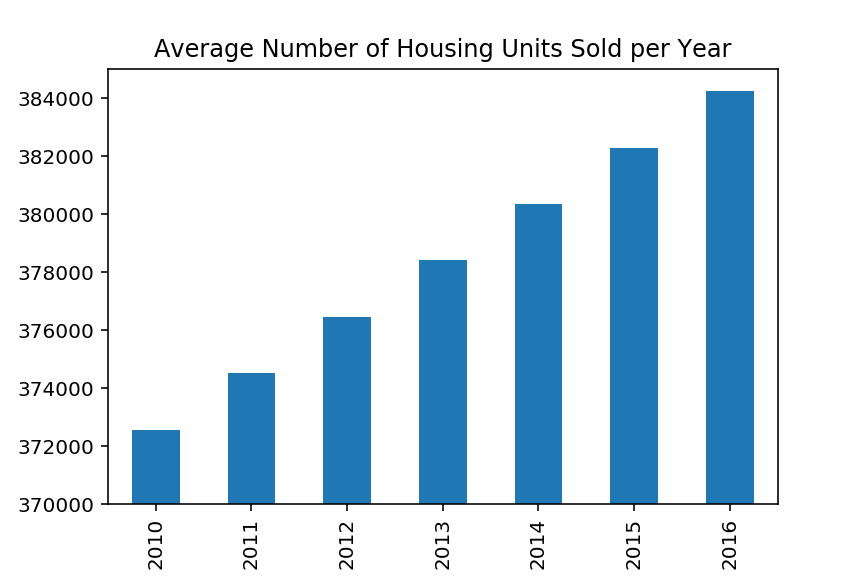

In [64]:
 housing_units_per_year()

Matplotlib(Figure)
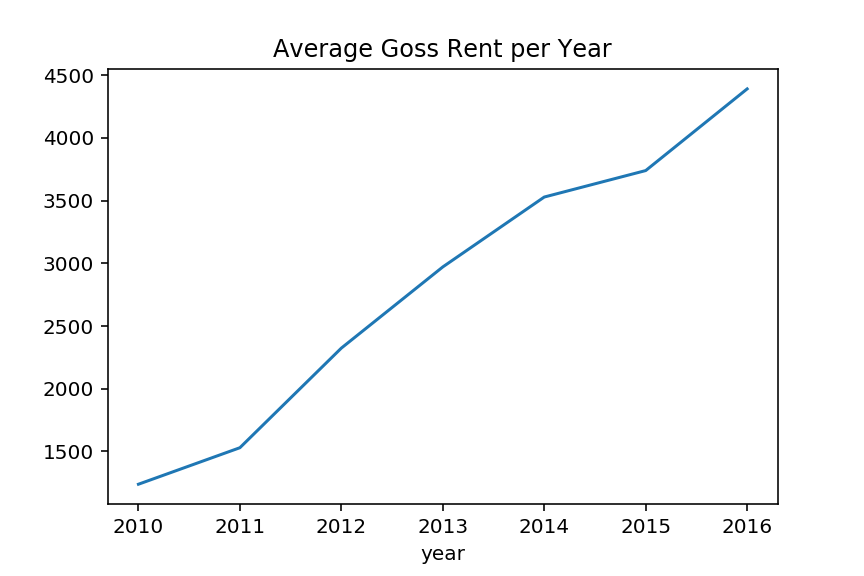

In [65]:
 average_gross_rent()

Matplotlib(Figure)
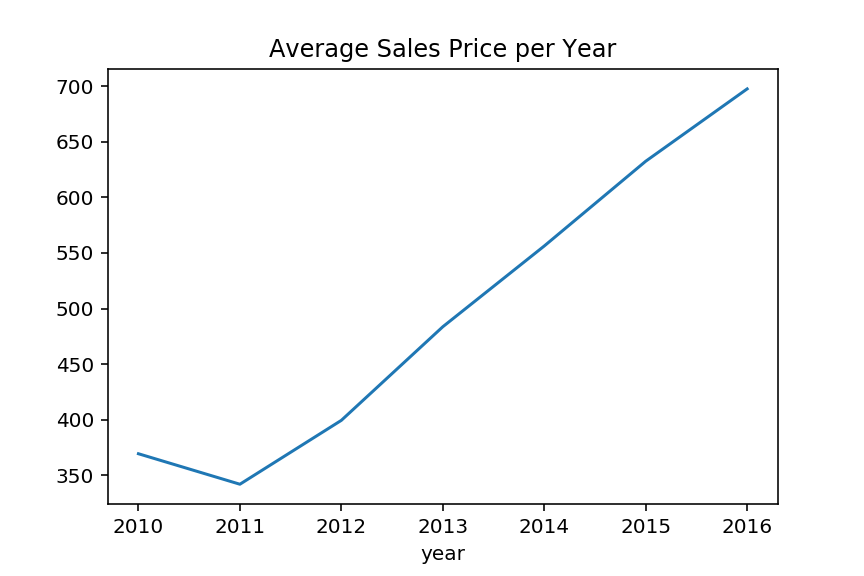

In [66]:
 average_sales_price()

In [67]:
 average_price_by_neighborhood()

TypeError: average_price_by_neighborhood() missing 1 required positional argument: 'neighborhood'

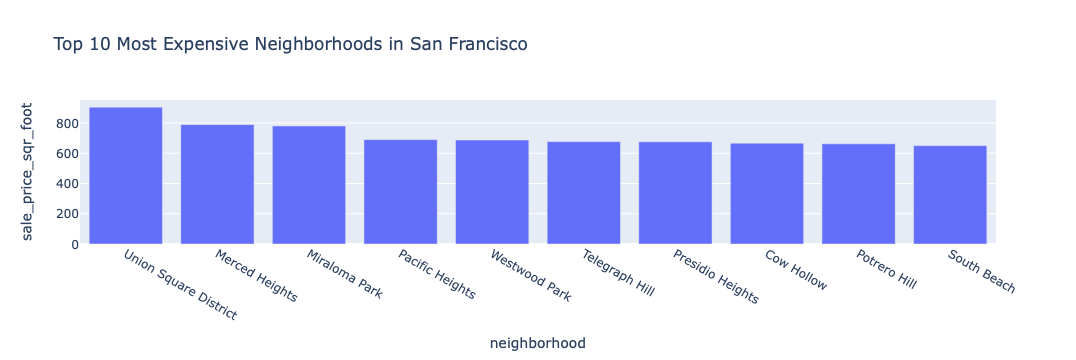

In [68]:
 top_most_expensive_neighborhoods()

In [46]:
most_expensive_neighborhoods_rent_sales()

KeyError: ('neighborhood', 'year')

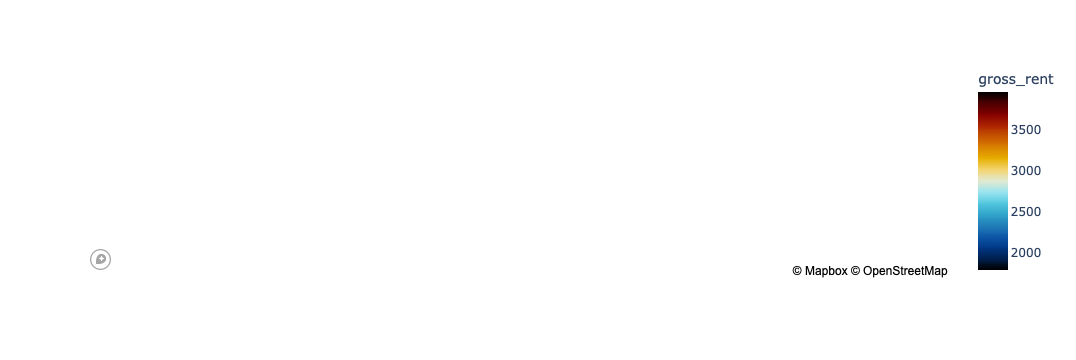

In [47]:
neighborhood_map().show()

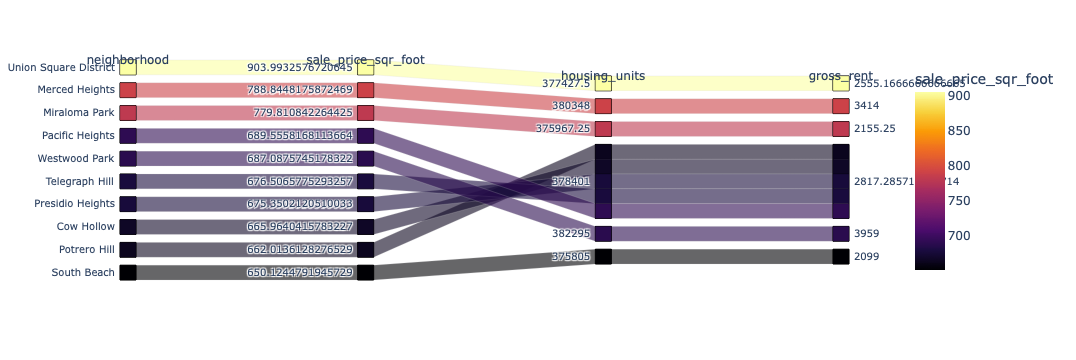

In [25]:
 parallel_categories()

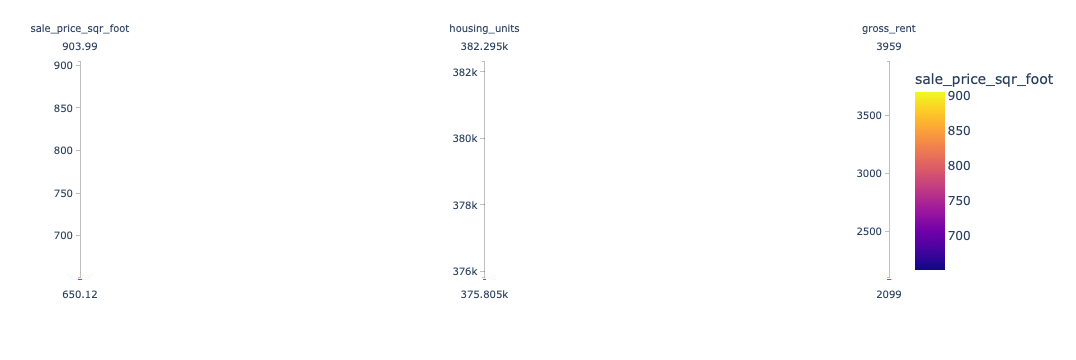

In [26]:
 parallel_coordinates()

In [74]:
 sunburst()
px.sunburst(
    
    
)
fig.show()

TypeError: sunburst() got an unexpected keyword argument 'lat'